Ahmed Baari  
126156004  
6th Semester - G

# EDA of 

In [87]:
import kagglehub

path = kagglehub.dataset_download("redwankarimsony/shampoo-saled-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/redwankarimsony/shampoo-saled-dataset/versions/1


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv(path + "/shampoo_sales.csv")
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [90]:
from datetime import datetime

In [106]:
print("Path to dataset files:", path)
df = pd.read_csv(path + "/shampoo_sales.csv")

Path to dataset files: /root/.cache/kagglehub/datasets/redwankarimsony/shampoo-saled-dataset/versions/1


In [104]:
def convert_month(month_str):
    year, month = map(int, month_str.split('-'))
    return datetime(2000 + year, month, 1)  #2000 +  year


In [107]:
df['Date'] = df['Month'].apply(convert_month)

df.head()

,Month,Sales,Date
0,1-01,266.0,2001-01-01
1,1-02,145.9,2001-02-01
2,1-03,183.1,2001-03-01
3,1-04,119.3,2001-04-01
4,1-05,180.3,2001-05-01


In [94]:
df.describe()

,Sales,Date
count,36.000000,36
mean,312.600000,2006-08-01 14:00:00
min,119.300000,2001-01-01 00:00:00
25%,192.450000,2003-10-16 12:00:00
50%,280.150000,2006-08-01 00:00:00
75%,411.100000,2009-05-16 12:00:00
max,682.000000,2012-03-01 00:00:00
std,148.937164,NaN


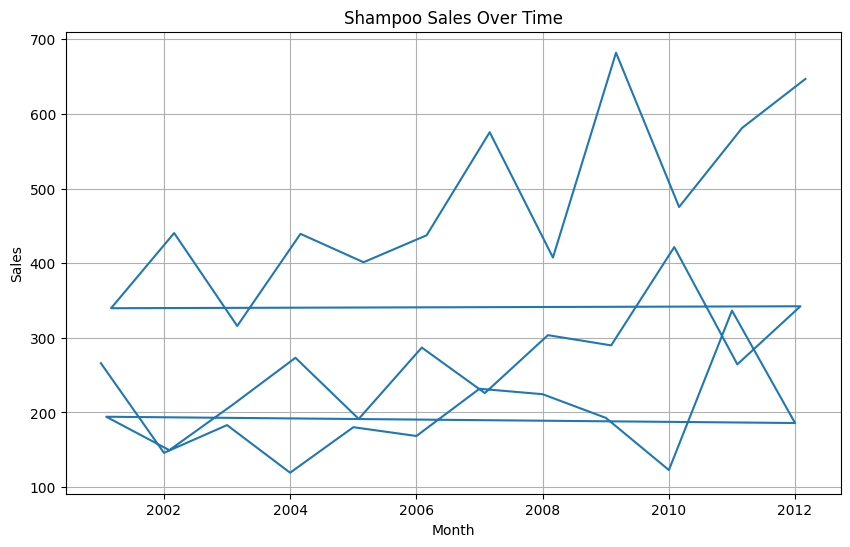

In [95]:
# Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sales'])
plt.title('Shampoo Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Text(0.5, 0, 'Sales')

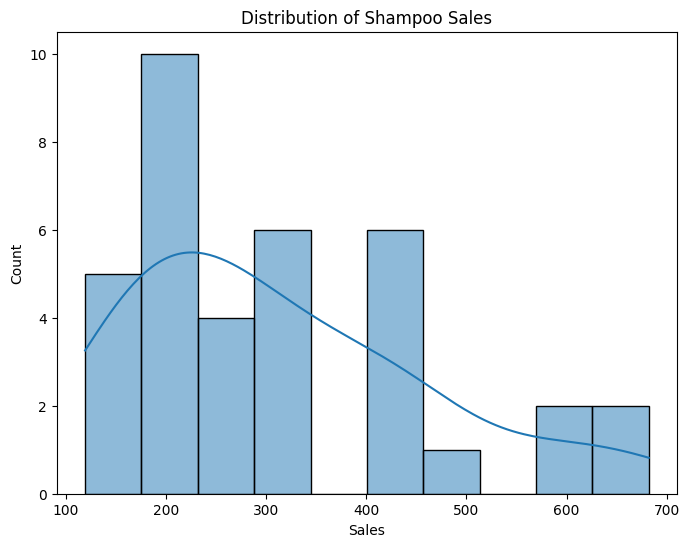

In [96]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], bins=10, kde=True)
plt.title('Distribution of Shampoo Sales')
plt.xlabel('Sales')

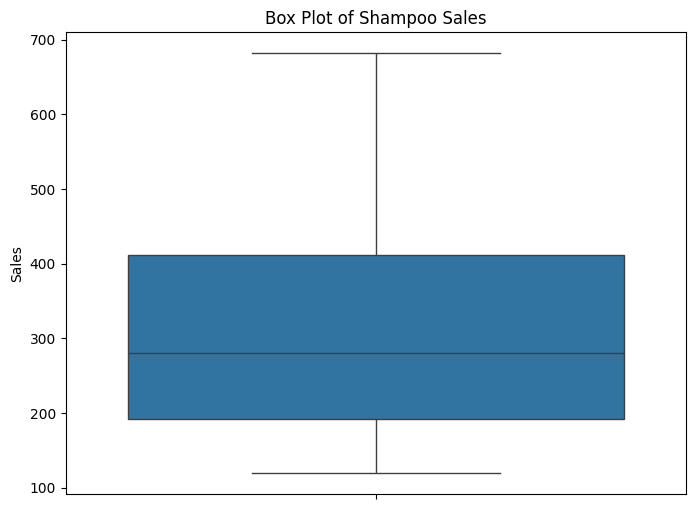

In [97]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Sales'])
plt.title('Box Plot of Shampoo Sales')
plt.ylabel('Sales')
plt.show()

In [98]:
df.dtypes

,0
Month,object
Sales,float64
Date,datetime64[ns]


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     object        
 1   Sales   36 non-null     float64       
 2   Date    36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 996.0+ bytes


In [100]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Month,Sales,Date,Year,Day
0,1,266.0,2001-01-01,2001,1
1,1,145.9,2002-01-01,2002,1
2,1,183.1,2003-01-01,2003,1
3,1,119.3,2004-01-01,2004,1
4,1,180.3,2005-01-01,2005,1


### Lag Based features

In [101]:
df['Sales_Lag1'] = df['Sales'].shift(1)  # Lag of 1 month
df['Sales_Lag2'] = df['Sales'].shift(2)
df['Sales_Lag2'] = df['Sales'].shift(3)
df['Sales_Lag2'] = df['Sales'].shift(4)
df['Sales_Lag2'] = df['Sales'].shift(5)
df.head()

,Month,Sales,Date,Year,Day,Sales_Lag1,Sales_Lag2
0,1,266.0,2001-01-01,2001,1,NaN,NaN
1,1,145.9,2002-01-01,2002,1,266.0,NaN
2,1,183.1,2003-01-01,2003,1,145.9,NaN
3,1,119.3,2004-01-01,2004,1,183.1,NaN
4,1,180.3,2005-01-01,2005,1,119.3,NaN


## sliding and expanding window features

In [102]:
df['Sales_RollingMean'] = df['Sales'].rolling(window=3).mean()  # 3-month rolling mean
df['Sales_RollingStd'] = df['Sales'].rolling(window=3).std()   # 3-month rolling standard deviation

df.head()

,Month,Sales,Date,Year,Day,Sales_Lag1,Sales_Lag2,Sales_RollingMean,Sales_RollingStd
0,1,266.0,2001-01-01,2001,1,NaN,NaN,NaN,NaN
1,1,145.9,2002-01-01,2002,1,266.0,NaN,NaN,NaN
2,1,183.1,2003-01-01,2003,1,145.9,NaN,198.333333,61.482057
3,1,119.3,2004-01-01,2004,1,183.1,NaN,149.433333,32.046425
4,1,180.3,2005-01-01,2005,1,119.3,NaN,160.900000,36.053849


In [103]:
df['Sales_ExpandingMean'] = df['Sales'].expanding().mean()
df['Sales_ExpandingMax'] = df['Sales'].expanding().max()
df.head()

,Month,Sales,Date,Year,Day,Sales_Lag1,Sales_Lag2,Sales_RollingMean,Sales_RollingStd,Sales_ExpandingMean,Sales_ExpandingMax
0,1,266.0,2001-01-01,2001,1,NaN,NaN,NaN,NaN,266.000000,266.0
1,1,145.9,2002-01-01,2002,1,266.0,NaN,NaN,NaN,205.950000,266.0
2,1,183.1,2003-01-01,2003,1,145.9,NaN,198.333333,61.482057,198.333333,266.0
3,1,119.3,2004-01-01,2004,1,183.1,NaN,149.433333,32.046425,178.575000,266.0
4,1,180.3,2005-01-01,2005,1,119.3,NaN,160.900000,36.053849,178.920000,266.0
